
# DTSC 691: Machine Learning Project

# Capstone Project : Cervical Cancer : Risk Factors

## Background Information

#### Cervical cancer is a form of cancer that affects the cervix’s cells. The cervix can be found in the lower region of the uterus which connects to the vagina. Cervical cancer can only occur in women. Multiple factors can contribute to the development of cervical cancer. Major factors that play a major role or increases the chance of developing cervical cancer is HPV,  other cancer, CIN, and Age. HPV also known as Human papillomavirus, is a commonvirus that can cause cancer. Women who are diagnosed with HPV have a very high chance of developing cervical cancer because of the damage done to the Immune system by the HPV.Women can reduce the risk of cervical cancer by getting the HPV vaccine. In this project, I will be working with patients' medical records that comprises possible risk factors (features) and diagnosis(response).
#### The primary goal of this assignment is to highlight the role of data science in healthcare. The use of data science in medicine can be very beneficial. Medical diagnostics with data science are becoming more and more efficient and accessible to patients and doctors. There are other benefits of data science in healthcare such as drug discovery, biosymetrics, etc. 

#### For my project, I will be focusing on medical diagnosis by using past medical history data to predict diagnosis and risk probability. With machine learning tools, we can predict illness and treatments that will help physicians intervene earlier. In this project, although studies in the past indicate that HPV significantly increases the chance of cervical cancer. We can use machine learning to determine other high-risk factors of cervical cancer. The secondary goal of this project is to analyze a dataset of patient Electronic medical records and history, to determine the risk factors that contribute to cervical cancer. And, to determine the best machine learning algorithm model for future prediction. This dataset for this project comprises 858 patients records with 36 possibly contributing factors of cervical cancer. I will analyze this data and determine the high determining factors. Note, that is just only based on a statistical analysis of the dataset.
#### I hypothesize that high-risk factors(features) are going to be the previous diagnosis of HPV, cancer, CIN, Age, Number of sexual partners.  Through the statistical correlation and finding the feature of importance from my model, I will determine the high-risk factors.
#### Then, I will build three machine learning algorithms; Logistic regression, Random Forest Classification, and DecisionTree Classification, then compare results. Using the precision,recall, and accuracy score, I will determine the best machine learning algorithm for predicting future datasets. Again, I am hypothesizing that the Random Forest classification algorithm would be the best model for future prediction and will be used to determine the important features. As an individual who currently works in the healthcare field, one of my objectives is to improve the healthcare system. By working alongside physicians, I want to employ tools like machine learning to help them make quicker and more accurate diagnoses. Not only does it benefit the physician making diagnosis easier and quicker but also for the patients. Patients can get accurate diagnoses quicker or early interventions and begin treatments sooner.


## Import Dataset

#### CervicalCancer.CSV file - downladed from UCI Machine Learning Repository

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
import pickle
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
df = pd.read_csv('cervicalcancer.csv') #downloaded dataset from UCI Machine Learning Repository
df


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


## Data Cleaning and Exploratory Analysis

The cervical dataset contains a lot of missing values so I decided to drop them. Because there is so many values missing, I chose not to impute them in order to avoid any 
inaccuracies. I will be using randomoversampler technique later on to account for any imbalances

In [2]:
#first, I am replacing the '?' with nan so easier sorting

df = df.replace('?',np.nan)

df.isnull().sum()  # Identify the number of missing values in each column

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [3]:
# I will clean this data by removing NAN ; I am removing this two columns, they have 787 missing vaules(92% missing)
df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis = 1)


In [4]:
# further data cleaning, by removing rows with NAN
df = df.dropna()

In [5]:
#Checking if I have removed all the NULL values
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [6]:
#Now, I am Checking to see what I am left with. I have 668 patients data left with 34 columns
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [7]:
# get some info about datatype on my dataset. Ill convert the object Dtype to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 668 non-null    int64 
 1   Number of sexual partners           668 non-null    object
 2   First sexual intercourse            668 non-null    object
 3   Num of pregnancies                  668 non-null    object
 4   Smokes                              668 non-null    object
 5   Smokes (years)                      668 non-null    object
 6   Smokes (packs/year)                 668 non-null    object
 7   Hormonal Contraceptives             668 non-null    object
 8   Hormonal Contraceptives (years)     668 non-null    object
 9   IUD                                 668 non-null    object
 10  IUD (years)                         668 non-null    object
 11  STDs                                668 non-null    object

In [8]:
#convert the entire dataframe to numeric
df = df.apply(pd.to_numeric) 
df.info() # check datatype to make sure

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    int64  
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    float64
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    float64
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n

<AxesSubplot:xlabel='Age', ylabel='Count'>

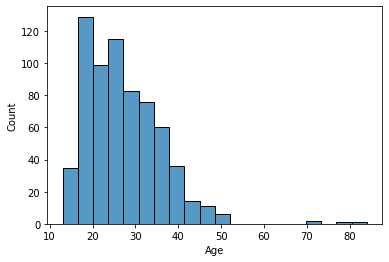

In [9]:
#Checking the Age range of the patients, because I want to know what age range has the most count
sns.histplot(df['Age'], bins = 20, kde = False)

In [10]:
#I am doing a statistical summary of my data
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,...,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,...,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Age: Youngest patient was 13 years old and oldest was 84 years old

In [11]:
#I  want to take a look at the correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap = "coolwarm")
#significant correlations are highlighted
# I can see what correlates with what

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.086533,0.372709,0.562229,0.055570,0.225829,0.119631,0.087482,0.292857,0.260514,0.206688,0.006242,-0.018520,-0.029120,nan,0.006542,-0.026257,0.009298,0.025463,-0.032256,-0.001176,nan,-0.001795,-0.032256,0.042321,-0.009647,0.105179,-0.022579,0.092913,0.039025,-0.030625,0.084757,-0.034654,0.056209
Number of sexual partners,0.086533,1.000000,-0.150872,0.098446,0.233542,0.157667,0.164829,0.010872,0.027334,0.042537,0.008065,0.024478,0.003054,-0.013521,nan,-0.048487,-0.011577,0.031690,0.034869,-0.036001,0.034869,nan,0.034305,-0.012377,0.015916,0.028022,0.023736,0.046826,0.033551,0.039524,-0.060498,-0.021903,0.013890,-0.002106
First sexual intercourse,0.372709,-0.150872,1.000000,-0.070213,-0.095313,-0.031433,-0.026922,0.028351,0.003205,-0.046032,-0.042287,-0.007522,0.009743,0.024659,nan,0.077829,0.029963,-0.110380,-0.001932,0.025241,-0.015519,nan,0.004378,0.011654,0.035723,-0.020016,0.051974,-0.034775,0.026537,0.036844,-0.003212,0.000073,-0.005705,0.028501
Num of pregnancies,0.562229,0.098446,-0.070213,1.000000,0.087312,0.202741,0.105120,0.155756,0.214918,0.219399,0.156386,0.034435,0.000200,-0.031127,nan,-0.003888,-0.030068,0.111444,-0.061439,-0.034995,0.044338,nan,0.020697,-0.034995,-0.030815,0.036106,0.035725,0.015748,0.059019,0.032272,0.036034,0.096651,-0.041908,0.046700
Smokes,0.055570,0.233542,-0.095313,0.087312,1.000000,0.719698,0.479872,0.010725,0.044432,-0.051074,-0.033530,0.124675,0.116616,0.068705,nan,0.078830,0.072313,0.110728,-0.015863,-0.015863,-0.015863,nan,0.034962,0.094515,0.055657,0.097559,-0.012007,-0.027516,0.019554,-0.064176,0.014189,0.028416,-0.029208,0.026099
Smokes (years),0.225829,0.157667,-0.031433,0.202741,0.719698,1.000000,0.719100,-0.013412,0.036247,0.039985,0.046639,0.082558,0.091425,0.049278,nan,0.125290,0.051873,0.024115,-0.011416,-0.011416,-0.011416,nan,0.059320,0.108704,0.055767,0.069037,0.061238,-0.019803,0.068921,-0.046187,0.028348,0.062863,-0.026184,0.036584
Smokes (packs/year),0.119631,0.164829,-0.026922,0.105120,0.479872,0.719100,1.000000,0.001055,0.012486,0.014682,0.020436,0.025540,0.032321,0.012565,nan,0.044585,0.014031,0.000558,-0.007612,-0.007612,-0.007612,nan,0.039149,0.108487,-0.008895,0.025863,0.119537,-0.013204,0.127199,-0.030796,-0.020647,-0.019500,-0.032816,-0.007776
Hormonal Contraceptives,0.087482,0.010872,0.028351,0.155756,0.010725,-0.013412,0.001055,1.000000,0.457789,0.046750,-0.040411,-0.029968,-0.036626,-0.011170,nan,-0.063809,-0.016247,-0.013834,0.028807,0.028807,-0.052045,nan,-0.053591,-0.052045,0.040769,-0.039413,0.020978,0.003219,0.034767,-0.006121,0.040580,0.004771,-0.014729,0.012882
Hormonal Contraceptives (years),0.292857,0.027334,0.003205,0.214918,0.044432,0.036247,0.012486,0.457789,1.000000,0.099699,-0.010854,-0.002528,-0.011114,0.002213,nan,-0.042545,0.004540,-0.000952,-0.016023,-0.021225,-0.023826,nan,-0.028451,-0.023826,0.054628,-0.033713,0.056982,0.012813,0.066478,-0.016839,0.019653,0.081957,0.018749,0.083751
IUD,0.260514,0.042537,-0.046032,0.219399,-0.051074,0.039985,0.014682,0.046750,0.099699,1.000000,0.745261,0.043232,0.047683,0.079724,nan,0.033859,0.062118,-0.053900,-0.013770,-0.013770,-0.013770,nan,0.018551,-0.013770,-0.019489,0.031175,0.093078,-0.023887,0.037326,0.099351,0.060255,0.096157,0.012564,0.074680


The significant correlations between variables are highlighted

Some variables statistically correlates with each other, for example, age and num of pregnancies. This would make sense that there is a significant correlation between those two

In [12]:
# I want analyze patients with positive diagnosis for cervical cancer
df2 = df.loc[df['Dx']== 1] #extract data first, checkin how many positive for cervical cancer
df2

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,0,0,0
188,27,5.0,19.0,2.0,0.0,0.0,0.0,1.0,3.00,0.0,...,0.0,0,1,0,1,1,0,0,1,0
229,27,3.0,15.0,4.0,0.0,0.0,0.0,1.0,6.00,0.0,...,0.0,0,0,1,0,1,0,0,0,0
335,29,2.0,18.0,4.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,1,1,1
432,31,3.0,19.0,1.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,0,1,0,0,1,0,0,0,0
578,19,1.0,18.0,1.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0,1,0,1,1,1,1,1,1
610,21,2.0,18.0,3.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,0,1,0,1,1,1,1,0,1
655,21,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,1,0,1,0,0,0,1
727,31,2.0,19.0,2.0,0.0,0.0,0.0,1.0,9.00,0.0,...,0.0,0,1,0,1,1,0,0,1,0
738,27,6.0,17.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,0,0,0


I extracted this data so I can get some statistical summary from it. 
Also with only 16 positive cases, this is a big imbalance given there are 600+ patients. I will be account for this before training my model.

In [13]:
df2.describe()

# 16 cases with age ranging 18-45 more to be diagonised with cervical cancer, there is no significant correlation,
#this is just the range women in this dataset with cervical cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,16.000000,16.000000,16.000000,16.000,16.0,16.0,16.0,16.000,16.000000,16.000000,...,16.0000,16.0000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000
mean,29.437500,2.937500,17.812500,2.625,0.0,0.0,0.0,0.625,1.890000,0.312500,...,0.0625,0.0625,0.812500,0.187500,0.687500,1.0,0.187500,0.250000,0.250000,0.312500
std,6.994939,1.388944,1.796988,1.500,0.0,0.0,0.0,0.500,2.791396,0.478714,...,0.2500,0.2500,0.403113,0.403113,0.478714,0.0,0.403113,0.447214,0.447214,0.478714
min,19.000000,1.000000,14.000000,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,26.500000,2.000000,17.000000,1.750,0.0,0.0,0.0,0.000,0.000000,0.000000,...,0.0000,0.0000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,28.000000,3.000000,18.000000,2.500,0.0,0.0,0.0,1.000,0.580000,0.000000,...,0.0000,0.0000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,31.500000,3.000000,19.000000,4.000,0.0,0.0,0.0,1.000,3.000000,1.000000,...,0.0000,0.0000,1.000000,0.000000,1.000000,1.0,0.000000,0.250000,0.250000,1.000000
max,45.000000,6.000000,20.000000,5.000,0.0,0.0,0.0,1.000,9.000000,1.000000,...,1.0000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


# Prepare Dataset For Model Training: Split Dataset

In [14]:
# classify my response data
response = df[['Dx']]

In [15]:
# rename response
y = response

y

,Dx
0,0
1,0
3,0
4,0
5,0
...,...
853,0
854,0
855,0
856,0


In [16]:
#classify features
features = df.drop(['Dx'],axis = 1)

In [17]:
#rename
X = features

X

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


### RandomOverSampler to account for imbalances

In [19]:
#This is where i account for the imbalances in my data; there are only 16 positives for cervical cancer out of 668 patients

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)

X_new, y_new = ros.fit_resample(X,y) #fit x and y to duplicate enough positive as negative using already existing data


y_new

,Dx
0,0
1,0
2,0
3,0
4,0
...,...
1299,1
1300,1
1301,1
1302,1


In [20]:
#Checking to see how many positive case I have now compared to before which was 16

print(y_new[y_new.Dx == 1])

      Dx
7      1
155    1
187    1
267    1
344    1
...   ..
1299   1
1300   1
1301   1
1302   1
1303   1

[652 rows x 1 columns]


Now I Have 652 postive cases for cervical cancer

## Train Test Split

In [21]:
# Now I will split my dataset into train and test data


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size= 0.2, random_state = 42)


## Grid Search For Best Parameters

In [22]:
#Grid Search for Best parameter for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid = {'solver':['newton-cg','lbfgs','liblinear'],
              'max_iter': [100,200,400,600,800,1000],
}
              
grid_search_cv = GridSearchCV(LogisticRegression(random_state = 42), param_grid = param_grid)


In [23]:
grid_search_cv.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [100, 200, 400, 600, 800, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [24]:
best_params = grid_search_cv.best_params_    


print("The best parameters are: ", best_params  )

The best parameters are:  {'max_iter': 100, 'solver': 'newton-cg'}


### Refined Grid Search

In [25]:
param_grid2 = {'solver':['newton-cg'],
              'max_iter': [90,95,100,120,150,100]
}
              
grid_search_cv2 = GridSearchCV(LogisticRegression(random_state = 42), param_grid = param_grid2)


In [26]:
grid_search_cv2.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [90, 95, 100, 120, 150, 100],
                         'solver': ['newton-cg']})

In [27]:
best_params2 = grid_search_cv2.best_params_    


print("The best parameters are: ", best_params2 )

The best parameters are:  {'max_iter': 90, 'solver': 'newton-cg'}


## Train Model

In [28]:
# Perform Logistic regression, fit model , and test

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver = 'newton-cg', max_iter = 90)
LogReg.fit(X_train, y_train)


LogisticRegression(max_iter=90, solver='newton-cg')

In [29]:
#Calculate the precision,recall, and score

from sklearn.metrics import precision_score ,recall_score, accuracy_score
pred_LogReg = LogReg.predict(X_test)
print(" clf Precision = ", precision_score(pred_LogReg,y_test))
print("clf Recall = ", recall_score(pred_LogReg,y_test))
print("clf Accuracy = ", accuracy_score(pred_LogReg,y_test))


 clf Precision =  1.0
clf Recall =  0.9846153846153847
clf Accuracy =  0.9923371647509579


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
pred_dtc = dtc.predict(X_test)
from sklearn.metrics import precision_score ,recall_score, accuracy_score
print(" rnd Precision = ", precision_score(y_test,pred_dtc))
print(" rnd Recall = ", recall_score(pred_dtc,y_test))
print(" rnd Accuracy = ", accuracy_score(y_test,pred_dtc))

 rnd Precision =  1.0
 rnd Recall =  1.0
 rnd Accuracy =  1.0


In [32]:
# testing if this model is better than logistic reg model
from sklearn.ensemble import RandomForestClassifier

rnd = RandomForestClassifier(random_state = 42)
rnd.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# gave similar scores
pred_rnd = rnd.predict(X_test)
from sklearn.metrics import precision_score ,recall_score, accuracy_score
print(" rnd Precision = ", precision_score(pred_rnd,y_test))
print(" rnd Recall = ", recall_score(pred_rnd,y_test))
print(" rnd Accuracy = ", accuracy_score(pred_rnd,y_test))

 rnd Precision =  1.0
 rnd Recall =  0.9922480620155039
 rnd Accuracy =  0.9961685823754789


# Perform Feature Importance

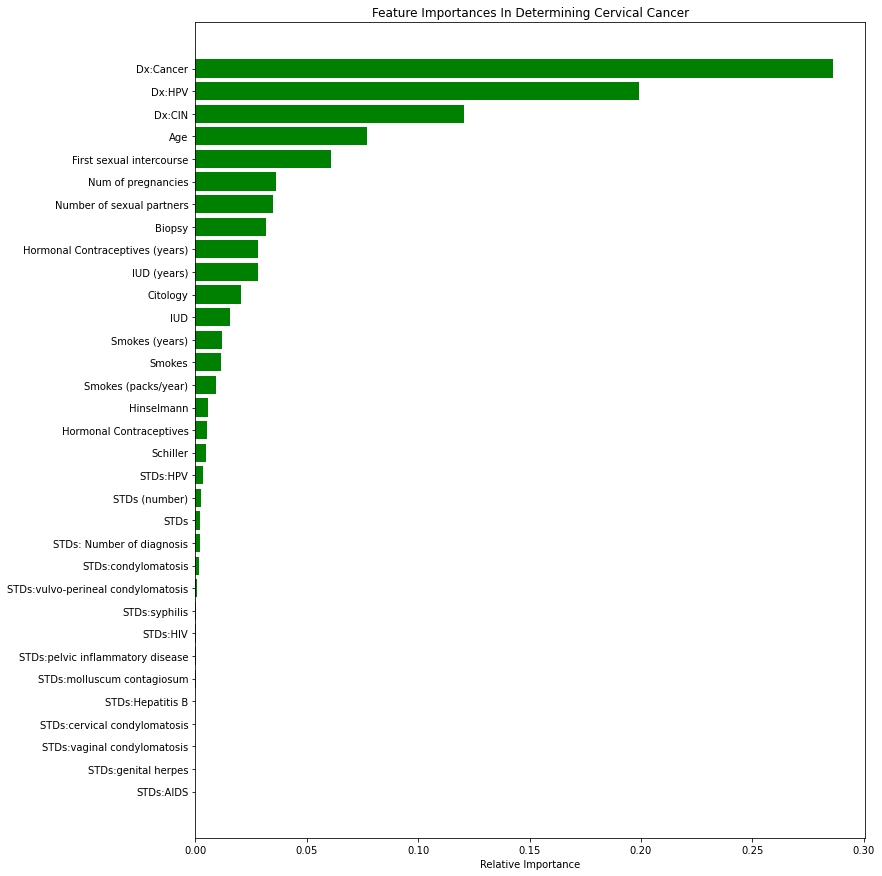

In [34]:
#I want to determine which features are high determine factors of cervical cancer

# plotting feature importances
features = X.columns
importances = rnd.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,15))
plt.title('Feature Importances In Determining Cervical Cancer')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Re-train Model With Chosen Important Features

In [35]:
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
982,33,3.0,19.0,3.0,0.0,0.0,0.0,1.0,0.16,1.0,...,0.0,0.0,0,1,0,1,1,1,0,1
969,27,2.0,14.0,3.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
10,45,4.0,14.0,6.0,0.0,0.0,0.0,1.0,10.00,1.0,...,0.0,0.0,0,0,0,0,0,0,0,0
147,26,1.0,19.0,3.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
346,20,3.0,17.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0.0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,31,3.0,19.0,1.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,0.0,0,1,0,0,0,0,0,0
1130,31,3.0,19.0,1.0,0.0,0.0,0.0,0.0,0.00,1.0,...,0.0,0.0,0,1,0,0,0,0,0,0
1294,27,5.0,19.0,2.0,0.0,0.0,0.0,1.0,3.00,0.0,...,0.0,0.0,0,1,0,1,0,0,1,0
860,41,3.0,18.0,5.0,0.0,0.0,0.0,1.0,1.00,1.0,...,0.0,0.0,0,1,0,1,0,0,0,0


In [36]:
#Now that I know the important features in predicting cervical cancer, I am going to choose the first 8 features

X_train_new = X_train[['Age','Number of sexual partners','Num of pregnancies','First sexual intercourse',
                     'Dx:Cancer','Dx:CIN', 'Dx:HPV','Biopsy']]

X_train_new

,Age,Number of sexual partners,Num of pregnancies,First sexual intercourse,Dx:Cancer,Dx:CIN,Dx:HPV,Biopsy
982,33,3.0,3.0,19.0,1,0,1,1
969,27,2.0,3.0,14.0,1,0,1,0
10,45,4.0,6.0,14.0,0,0,0,0
147,26,1.0,3.0,19.0,0,0,0,0
346,20,3.0,2.0,17.0,0,0,0,1
...,...,...,...,...,...,...,...,...
1095,31,3.0,1.0,19.0,1,0,0,0
1130,31,3.0,1.0,19.0,1,0,0,0
1294,27,5.0,2.0,19.0,1,0,1,0
860,41,3.0,5.0,18.0,1,0,1,0


In [37]:
# Do the same for the test dataset; choose the first 8

X_test_new = X_test[['Age','Number of sexual partners','Num of pregnancies','First sexual intercourse',
                     'Dx:Cancer','Dx:CIN', 'Dx:HPV','Biopsy']]

X_test_new

,Age,Number of sexual partners,Num of pregnancies,First sexual intercourse,Dx:Cancer,Dx:CIN,Dx:HPV,Biopsy
1172,27,3.0,4.0,15.0,0,1,0,0
514,37,3.0,5.0,20.0,0,0,0,0
843,41,3.0,5.0,18.0,1,0,1,0
977,19,1.0,1.0,18.0,1,0,1,1
1168,25,5.0,4.0,15.0,0,1,0,0
...,...,...,...,...,...,...,...,...
140,29,4.0,3.0,16.0,0,0,0,0
949,29,2.0,4.0,18.0,1,0,1,1
415,19,1.0,1.0,17.0,0,0,0,0
199,25,3.0,3.0,18.0,0,0,0,0


In [38]:
#now I will build another model for this 8 features so I can use them for my API web dev

from sklearn.ensemble import RandomForestClassifier

rnd_new = RandomForestClassifier(random_state = 42)
rnd_new.fit(X_train_new, y_train)

RandomForestClassifier(random_state=42)

In [39]:
pred_rnd_new = rnd_new.predict(X_test_new)
from sklearn.metrics import precision_score ,recall_score, accuracy_score
print(" rnd Precision = ", precision_score(pred_rnd_new,y_test))
print(" rnd Recall = ", recall_score(pred_rnd_new,y_test))
print(" rnd Accuracy = ", accuracy_score(pred_rnd_new,y_test))

 rnd Precision =  1.0
 rnd Recall =  0.9922480620155039
 rnd Accuracy =  0.9961685823754789


In [40]:
from sklearn.linear_model import LogisticRegression
LogReg_new = LogisticRegression(solver = 'newton-cg', max_iter = 90,)
LogReg_new.fit(X_train_new, y_train)


LogisticRegression(max_iter=90, solver='newton-cg')

In [41]:
from sklearn.metrics import precision_score ,recall_score, accuracy_score
pred_LogReg_new = LogReg_new.predict(X_test_new)
print(" clf Precision = ", precision_score(pred_LogReg_new,y_test))
print("clf Recall = ", recall_score(pred_LogReg_new,y_test))
print("clf Accuracy = ", accuracy_score(pred_LogReg_new,y_test))


 clf Precision =  1.0
clf Recall =  0.9846153846153847
clf Accuracy =  0.9923371647509579


# Results and Discussion

In [42]:
#table to compare all three models
from tabulate import tabulate
table = [["model",'item','Values'],["RandomForest Classifier",'Accuracy', "0.99"], [" ",'Precision',"1"],
        [" ",'Recall',"0.99"],["LogisticRegresion",'Accuracy', "0.99"], 
         [" ",'Precision',"1"], [" ",'Recall',"0.98"],['DecisionTreee','Accuracy','1'],[' ','Precision','1'],
         [' ','Recall','1']]

print(tabulate(table,headers = 'firstrow'))

model                    item         Values
-----------------------  ---------  --------
RandomForest Classifier  Accuracy       0.99
                         Precision      1
                         Recall         0.99
LogisticRegresion        Accuracy       0.99
                         Precision      1
                         Recall         0.98
DecisionTreee            Accuracy       1
                         Precision      1
                         Recall         1


Discussion

Based on the corr and the features importance, we can conclude thatDx:Cancer, Dx:HPV and DX:CIN are
high contributing/determining factors of cervical cancer. 

Based on the Accuracy score we can see that these are all good ML model. They have 0.99 accuracy or 1. So it doesnt really matter which model I will be using for my next step/

# Using Pickle to transport Model(with important features)

In [43]:
#Now, I will be using pickle to save my model for transport
pickle.dump(rnd_new,open('model.pkl','wb')) #this will save it to disk
model = pickle.load(open('model.pkl','rb')) # this will load the model

In [65]:
pickle.dump(LogReg_new,open('model2.pkl','wb')) #this will save it to disk
model2 = pickle.load(open('model2.pkl','rb')) # this will load the model